In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib
import json

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('btmp_03.csv')
len(df)

470472

In [5]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)

In [5]:
df_geo = pd.DataFrame(columns=['ip','success','type','continent','continent_code','country_code','country_flag','country_capital',
 'country_phone','country_neighbours','region','city','latitude', 'longitude','asn','org','isp','timezone','timezone_name',
 'timezone_dstOffset','timezone_gmtOffset','timezone_gmt','currency','currency_code','currency_symbol','currency_rates',
 'currency_plural','completed_requests'])

In [ ]:
# Do NOT DELETE
# With this code all the geolocation data collected
# ip_data = df['HostName_1'].unique()
# for i in range(len(ip_data)):
#    ip = ip_data[i]
#    response = urllib.request.urlopen("http://ipwhois.app/json/"+ip)
#    ipgeolocation = json.load(response)
#    df_geo = df_geo.append({'ip':ipgeolocation['ip'],'success':ipgeolocation['success'],'type':ipgeolocation['type'],'continent':ipgeolocation['continent'],'continent_code':ipgeolocation['continent_code'],'country_code':ipgeolocation['country_code'],'country_flag':ipgeolocation['country_flag'],'country_capital':ipgeolocation['country_capital'],
# 'country_phone':ipgeolocation['country_phone'],'country_neighbours':ipgeolocation['country_neighbours'],'region':ipgeolocation['region'],'city':ipgeolocation['city'],'latitude':ipgeolocation['latitude'], 'longitude':ipgeolocation['longitude'],'asn':ipgeolocation['asn'],'org':ipgeolocation['org'],'isp':ipgeolocation['isp'],'timezone':ipgeolocation['timezone'],'timezone_name':ipgeolocation['timezone_name'],
# 'timezone_dstOffset':ipgeolocation['timezone_dstOffset'],'timezone_gmtOffset':ipgeolocation['timezone_gmtOffset'],'timezone_gmt':ipgeolocation['timezone_gmt'],'currency':ipgeolocation['currency'],'currency_code':ipgeolocation['currency_code'],'currency_symbol':ipgeolocation['currency_symbol'],'currency_rates':ipgeolocation['currency_rates'],
# 'currency_plural':ipgeolocation['currency_plural'],'completed_requests':ipgeolocation['completed_requests']},  ignore_index=True)
    

In [ ]:
df_geo.columns

In [ ]:
merged_df = pd.merge(df, df_geo, left_on='HostName_1', right_on='ip', how='left')


In [ ]:
merged_df.head()

In [6]:
df_geo = pd.read_csv('geodata_03.csv')
len(df_geo)
df_geo.head()

Unnamed: 0              ip  success  type continent continent_code  \
0           0   112.85.42.229     True  IPv4      Asia             AS   
1           1    218.92.0.195     True  IPv4      Asia             AS   
2           2   112.85.42.124     True  IPv4      Asia             AS   
3           3    112.85.42.87     True  IPv4      Asia             AS   
4           4  122.194.229.37     True  IPv4      Asia             AS   

  country_code                         country_flag country_capital  \
0           CN  https://cdn.ipwhois.io/flags/cn.svg         Beijing   
1           CN  https://cdn.ipwhois.io/flags/cn.svg         Beijing   
2           CN  https://cdn.ipwhois.io/flags/cn.svg         Beijing   
3           CN  https://cdn.ipwhois.io/flags/cn.svg         Beijing   
4           CN  https://cdn.ipwhois.io/flags/cn.svg         Beijing   

   country_phone                               country_neighbours   region  \
0             86  AF,BT,HK,IN,KG,KP,KZ,LA,MM,MN,MO,NP,PK,RU,TJ,VN  Jiangsu   
1             86  AF,BT,HK,IN,KG,KP,KZ,LA,MM,MN,MO,NP,PK,RU,TJ,VN  Jiangsu   
2             86  AF,BT,HK,IN,KG,KP,KZ,LA,MM,MN,MO,NP,PK,RU,TJ,VN  Jiangsu   
3             86  AF,BT,HK,IN,KG,KP,KZ,LA,MM,MN,MO,NP,PK,RU,TJ,VN  Jiangsu   
4             86  AF,BT,HK,IN,KG,KP,KZ,LA,MM,MN,MO,NP,PK,RU,TJ,VN  Jiangsu   

          city   latitude   longitude     asn  \
0       Suzhou  31.298979  120.585290  AS4837   
1  Lianyungang  34.596653  119.221611  AS4134   
2       Suzhou  31.298979  120.585290  AS4837   
3       Suzhou  31.298979  120.585290  AS4837   
4  Lianyungang  34.596653  119.221611  AS4837   

                                     org                             isp  \
0  China Unicom Jiangsu province network  CHINA UNICOM China169 Backbone   
1      CHINANET jiangsu province network               CHINANET-BACKBONE   
2  China Unicom Jiangsu province network  CHINA UNICOM China169 Backbone   
3  China Unicom Jiangsu province network  CHINA UNICOM China169 Backbone   
4  China Unicom Jiangsu province network  CHINA UNICOM China169 Backbone   

        timezone timezone_name  timezone_dstOffset  timezone_gmtOffset  \
0  Asia/Shanghai           CST                   0               28800   
1  Asia/Shanghai           CST                   0               28800   
2  Asia/Shanghai           CST                   0               28800   
3  Asia/Shanghai           CST                   0               28800   
4  Asia/Shanghai           CST                   0               28800   

  timezone_gmt      currency currency_code currency_symbol  currency_rates  \
0       +08:00  Chinese Yuan           CNY               ¥           6.378   
1       +08:00  Chinese Yuan           CNY               ¥           6.378   
2       +08:00  Chinese Yuan           CNY               ¥           6.378   
3       +08:00  Chinese Yuan           CNY               ¥           6.378   
4       +08:00  Chinese Yuan           CNY               ¥           6.378   

  currency_plural  completed_requests  
0    Chinese yuan                  12  
1    Chinese yuan                  13  
2    Chinese yuan                  14  
3    Chinese yuan                  15  
4    Chinese yuan                  16

In [7]:
df_geo.rename(columns={'ip':'HostName_1'}, inplace = True)
df = pd.merge(df,df_geo[['HostName_1','country_code','continent','org']], on='HostName_1', how='left')

In [8]:
df.head()

ut_type    PID UserName DeviceName     HostName_1     HostName_2  \
0        6  80407     root  ssh:notty  112.85.42.229  112.85.42.229   
1        6  80407     root  ssh:notty  112.85.42.229  112.85.42.229   
2        6  80407     root  ssh:notty  112.85.42.229  112.85.42.229   
3        6  80413     root  ssh:notty  112.85.42.229  112.85.42.229   
4        6  80413     root  ssh:notty  112.85.42.229  112.85.42.229   

     DateTime  HourTime country_code continent  \
0  2022-03-01  00:00:11           CN      Asia   
1  2022-03-01  00:00:14           CN      Asia   
2  2022-03-01  00:00:17           CN      Asia   
3  2022-03-01  00:00:23           CN      Asia   
4  2022-03-01  00:00:26           CN      Asia   

                                     org  
0  China Unicom Jiangsu province network  
1  China Unicom Jiangsu province network  
2  China Unicom Jiangsu province network  
3  China Unicom Jiangsu province network  
4  China Unicom Jiangsu province network

In [9]:
#center for the map
center_point = {'Lat': ['41.00'], 'Long': ['28.97'], 'Name':['US']}


center_point = pd.DataFrame(center_point)
center_point['Lat'] = center_point['Lat'].astype(float)
center_point['Long'] = center_point['Long'].astype(float)

In [10]:
# import the library and its Marker clusterization service
import folium
from folium.plugins import MarkerCluster
# Create a map object and center it to the avarage coordinates to m
m = folium.Map(location=center_point[["Lat", "Long"]].mean().to_list(), zoom_start=2)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(m)
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
for i,r in df_geo.iterrows():
    location = (r["latitude"], r["longitude"])
    folium.Marker(location=location, popup = r['country_code'], tooltip = r['country_code']).add_to(marker_cluster)
#display the map
m

In [ ]:
#m.save("folium_map.html")

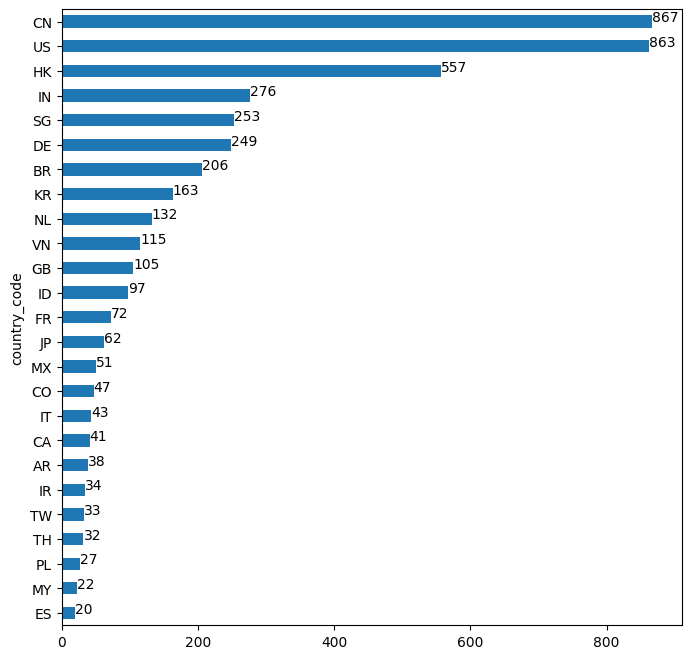

In [11]:
df_geo.groupby('country_code')['country_code'].count().sort_values().tail(25).plot.barh(figsize=(8,8))
for index, value in enumerate(df_geo.groupby('country_code')['country_code'].count().sort_values().tail(25)):
    plt.text(value, index,str(value))

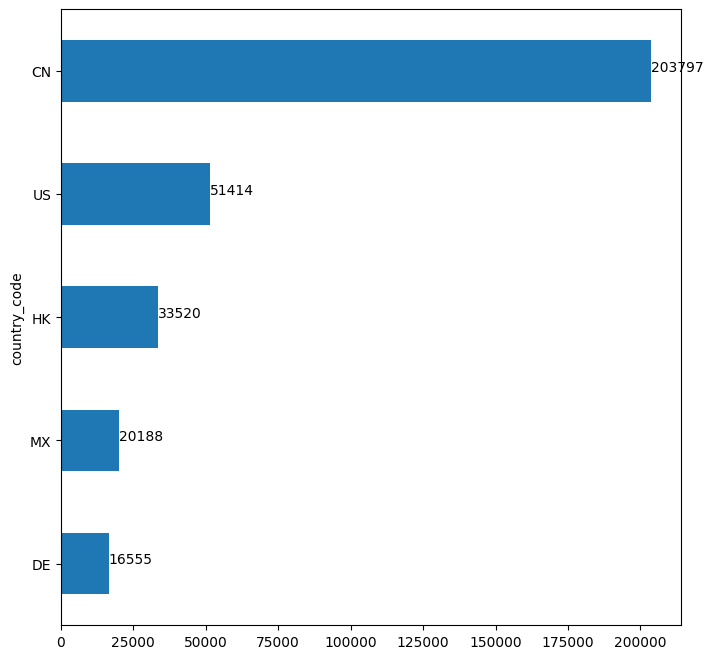

In [12]:
df.groupby('country_code')['country_code'].count().sort_values().tail(5).plot.barh(figsize=(8,8))
for index, value in enumerate(df.groupby('country_code')['country_code'].count().sort_values().tail(5)):
    plt.text(value, index,str(value))

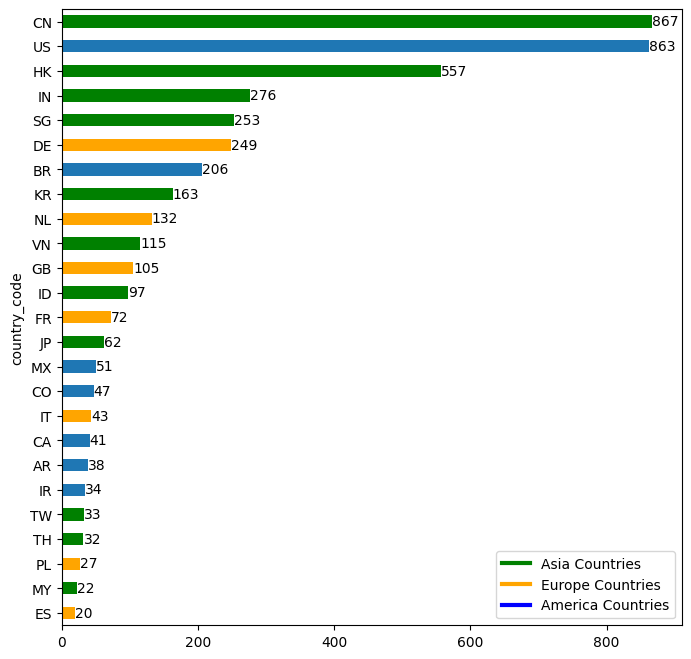

In [14]:
# ax = df_geo.groupby('country_code')['country_code'].count().sort_values().tail(25).plot.barh(figsize=(8, 8), color='lightblue')

# # Highlight specific country_code in green
# highlighted_country_codes = ['CN', 'HK', 'IN', 'SG','KR','VN','ID','JP','TW','TH','MY']  # Add your desired country codes here
# for index, (code, value) in enumerate(df_geo.groupby('country_code')['country_code'].count().sort_values().tail(25).items()):
#     color = 'green' if code in highlighted_country_codes else 'lightblue'
#     plt.text(value, index, str(value), color=color)

# # Show the plot
# plt.show()
ax = df_geo.groupby('country_code')['country_code'].count().sort_values().tail(25).plot.barh(figsize=(8, 8))

# Highlight specific country_code bars in green
highlighted_country_codes_green = ['CN', 'HK', 'IN', 'SG','KR','VN','ID','JP','TW','TH','MY']  # Add your desired country codes here
highlighted_country_codes_orange = ['DE','NL','GB','FR','IT','PL','ES']

# Access the bars and set color for the highlighted country codes
for index, (code, value) in enumerate(df_geo.groupby('country_code')['country_code'].count().sort_values().tail(25).items()):
    if code in highlighted_country_codes_green:
        ax.patches[index].set_facecolor('green')
    if code in highlighted_country_codes_orange:
        ax.patches[index].set_facecolor('orange')
    
    plt.text(value, index, str(value), ha='left', va='center', color='black')  # Add numbers to the bars

legend_labels = {'Asia Countries': 'green', 'Europe Countries': 'orange', 'America Countries': 'blue'}
legend_handles = [plt.Line2D([0], [0], color=color, linewidth=3, linestyle='-') for color in legend_labels.values()]
ax.legend(legend_handles, legend_labels.keys(), loc='lower right')
# Show the plot
plt.show()

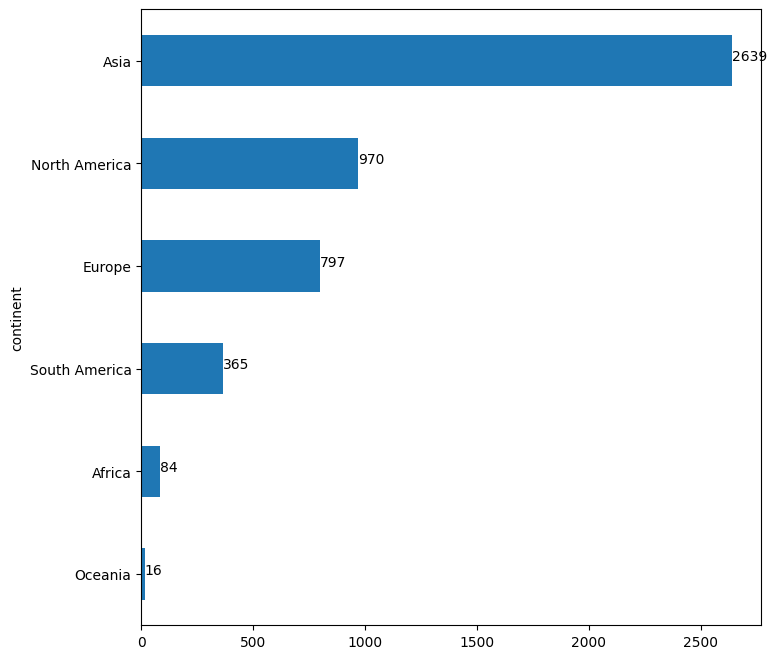

In [16]:
df_geo.groupby('continent')['continent'].count().sort_values().tail(25).plot.barh(figsize=(8,8))
for index, value in enumerate(df_geo.groupby('continent')['continent'].count().sort_values().tail(25)):
    plt.text(value, index,str(value))

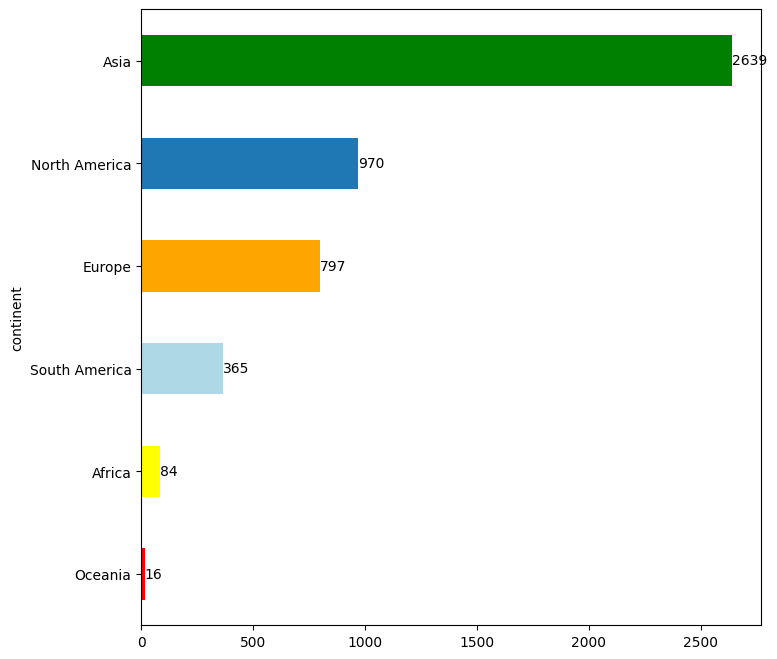

In [17]:
ax = df_geo.groupby('continent')['continent'].count().sort_values().tail(25).plot.barh(figsize=(8, 8))

# Highlight specific country_code bars in green
highlighted_continent_green = ['Asia']  # Add your desired country codes here
highlighted_continent_orange = ['Europe']
highlighted_continent_lightblue = ['South America']
highlighted_continent_yellow = ['Africa']
highlighted_continent_red = ['Oceania']


# Access the bars and set color for the highlighted country codes
for index, (code, value) in enumerate(df_geo.groupby('continent')['continent'].count().sort_values().tail(25).items()):
    if code in highlighted_continent_green:
        ax.patches[index].set_facecolor('green')
    if code in highlighted_continent_orange:
        ax.patches[index].set_facecolor('orange')
    if code in highlighted_continent_lightblue:
        ax.patches[index].set_facecolor('lightblue')
    if code in highlighted_continent_yellow:
        ax.patches[index].set_facecolor('yellow')
    if code in highlighted_continent_red:
        ax.patches[index].set_facecolor('red')
    
    plt.text(value, index, str(value), ha='left', va='center', color='black')  # Add numbers to the bars

# legend_labels = {'Asia': 'green', 'North America':'blue','Europe': 'orange', 'South America ': 'lightblue','Africa':'yellow', 'Oceania':'red'}
# legend_handles = [plt.Line2D([0], [0], color=color, linewidth=3, linestyle='-') for color in legend_labels.values()]
# ax.legend(legend_handles, legend_labels.keys(), loc='lower right')
plt.show()

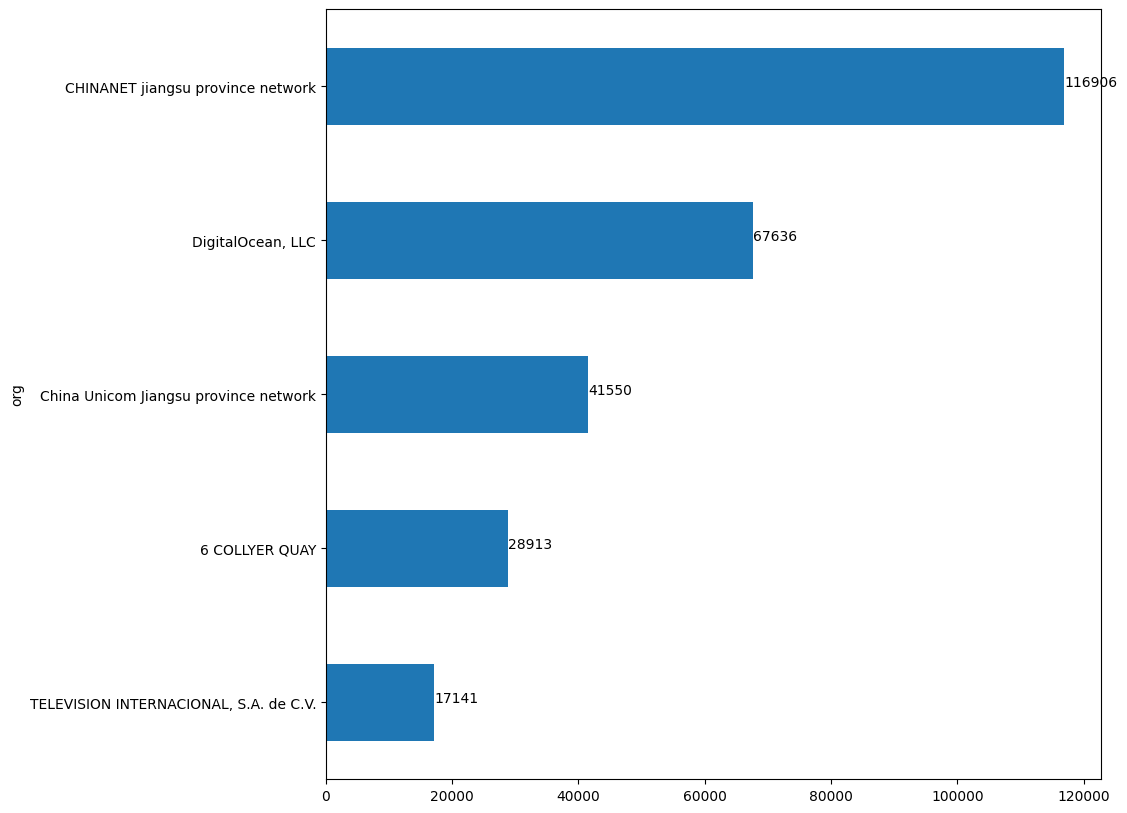

In [18]:
df.groupby('org')['HostName_1'].count().sort_values().tail(5).plot.barh(figsize=(10,10))
for index, value in enumerate(df.groupby('org')['HostName_1'].count().sort_values().tail(5)):
    plt.text(value, index,str(value))

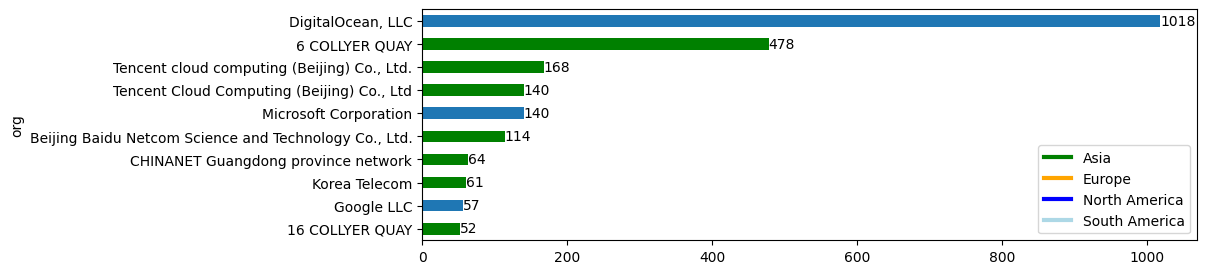

In [19]:
ax = df_geo.groupby('org')['HostName_1'].count().sort_values().tail(10).plot.barh(figsize=(10, 3))

# Highlight specific country_code bars in green
highlighted_green = ['China Unicom Jiangsu province network','China Mobile Communications Corporation','CHINANET Shanghai province network',
                    'LG DACOM Corporation','SK Broadband Co Ltd','UCLOUD INFORMATION TECHNOLOGY (HK) LIMITED','Shanghai UCloud Information Technology Company Limited',
                    'Viettel Group','CHINANET jiangsu province network','16 COLLYER QUAY','Korea Telecom','CHINANET Guangdong province network',
                    'Beijing Baidu Netcom Science and Technology Co., Ltd.','Tencent Cloud Computing (Beijing) Co., Ltd','Tencent cloud computing (Beijing) Co., Ltd.',
                    '6 COLLYER QUAY']  # Add your desired country codes here
highlighted_orange = ['OVH SAS','Contabo GmbH']
highlighted_lightblue = ['Telmex Colombia S.A.','TELEFÔNICA BRASIL S.A']



# Access the bars and set color for the highlighted country codes
for index, (code, value) in enumerate(df_geo.groupby('org')['HostName_1'].count().sort_values().tail(10).items()):
    if code in highlighted_green:
        ax.patches[index].set_facecolor('green')
    if code in highlighted_orange:
        ax.patches[index].set_facecolor('orange')
    if code in highlighted_lightblue:
        ax.patches[index].set_facecolor('lightblue')
    plt.text(value, index, str(value), ha='left', va='center', color='black')  # Add numbers to the bars


legend_labels = {'Asia': 'green', 'Europe': 'orange', 'North America': 'blue','South America':'lightblue'}
legend_handles = [plt.Line2D([0], [0], color=color, linewidth=3, linestyle='-') for color in legend_labels.values()]
ax.legend(legend_handles, legend_labels.keys(), loc='lower right')

plt.show()

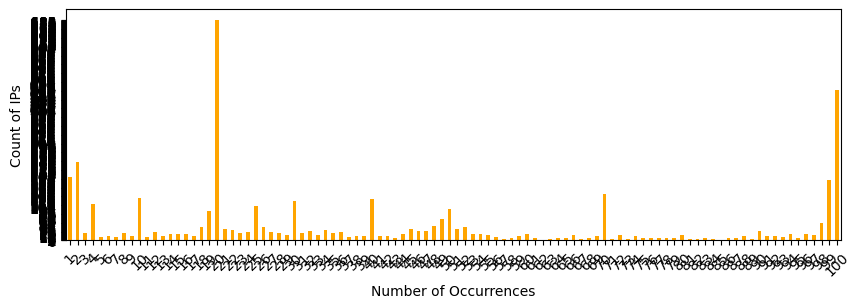

In [20]:
df['HostName_1'] = df['HostName_1'].astype(str)

# Count the unique IP addresses
ip_counts = df['HostName_1'].value_counts()



#count_distribution = ip_counts.value_counts().sort_index()
count_distribution = ip_counts.value_counts().sort_index().head(100)

# Plot the histogram
plt.figure(figsize=(10, 3))
count_distribution.plot(kind='bar', color='orange')
plt.title('')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count of IPs')
plt.xticks(rotation=45)
plt.yticks(range(int(count_distribution.max()) + 1))
plt.show()

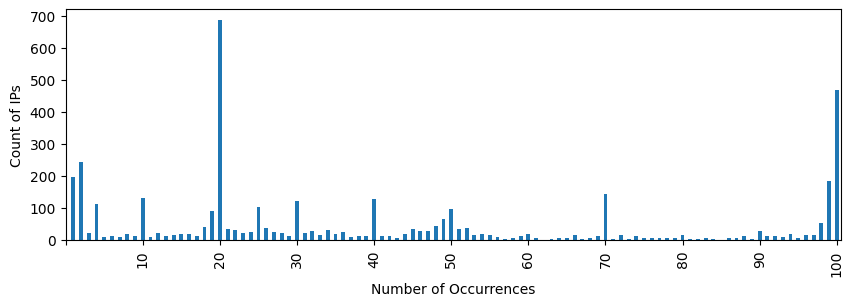

In [21]:
df['HostName_1'] = df['HostName_1'].astype(str)

# Count the unique IP addresses
ip_counts = df['HostName_1'].value_counts()



#count_distribution = ip_counts.value_counts().sort_index()
count_distribution = ip_counts.value_counts().sort_index().head(100)

# Plot the histogram
plt.figure(figsize=(10, 3))
count_distribution.plot(kind='bar')
plt.title('')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count of IPs')
#plt.xticks(range(0, int(count_distribution.index.max()), 10))
plt.xticks(range(-1, int(count_distribution.index.max()) + 1, 10))

#plt.xticks(rotation=45)
#plt.yticks(range(int(count_distribution.max()) + 100))
plt.show()

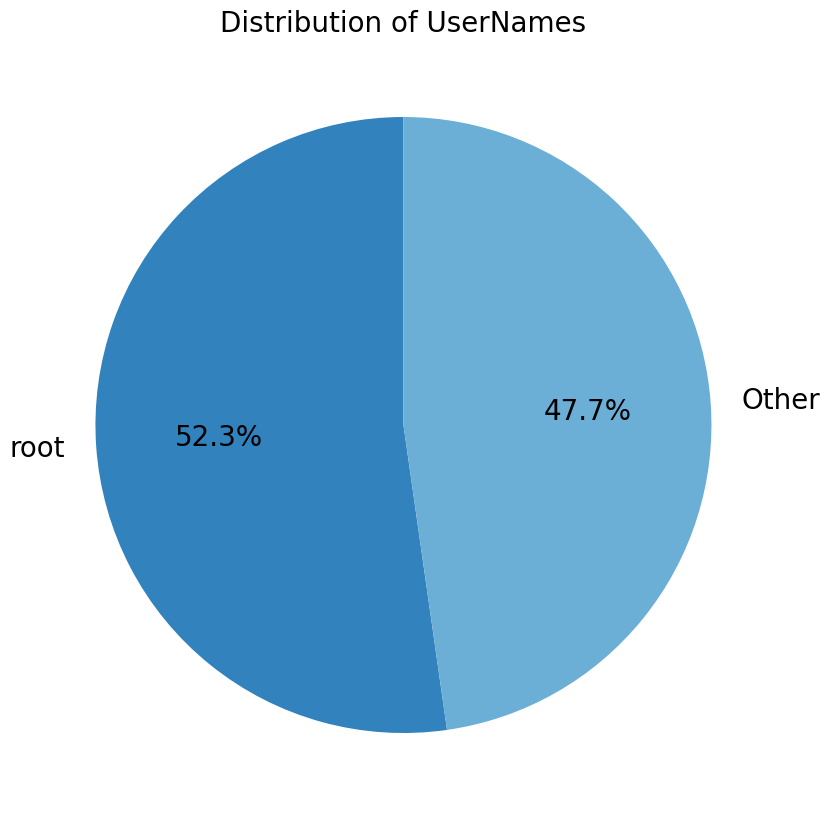

In [22]:
df['UserName'] = df['UserName'].astype(str)

# Count the occurrences of each UserName
username_counts = df['UserName'].value_counts()

# Choose the number of most common UserNames to include
top_n = 1  # You can adjust this number based on your preference

# Select the top n most common UserNames and group the rest as 'Other'
top_usernames = username_counts.head(top_n)
other_usernames = username_counts.iloc[top_n:]

# Combine 'Other' with the rest of the UserNames
other_count = other_usernames.sum()
combined_counts = pd.concat([top_usernames, pd.Series({'Other': other_count})])

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c.colors, textprops={'fontsize': 20})
plt.title('Distribution of UserNames', fontsize=20)
plt.show()
plt.show()